<a href="https://colab.research.google.com/github/hamant-jagwan/Cardiovascular_Risk_Prediction--ML--Classification/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Project Title : Cardiovascular Risk Prediction**


**Project type** - Classification

**Contribution** - Individual

**Index:**
1. Problem statement
2. Importing the libraries and the dataset
3. Understand the data
4. Data cleaning
5. Handling missing data
6. Exploratory data analysis
7. Feature selection
8. Data preprocessing
9. ML model implementation
10. Results
11. Summary and conclusions


# **1. Problem Statement:**

* Cardiovascular diseases (CVDs) are the major cause of mortality worldwide. According to WHO, 17.9 million people died from CVDs in 2019, accounting for 32% of all global fatalities.
* Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and, in some cases, even death.
* As a result, it is critical that we accurately predict the risk of heart disease in order to avert as many fatalities as possible.

# **2. Importing the libraries and the dataset:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
# Load Dataset
data = 'https://raw.githubusercontent.com/hamant-jagwan/Cardiovascular_Risk_Prediction--ML--Classification/main/Cardiovascular_Risk_Prediction.csv'
cardio_df = pd.read_csv(data,index_col='id', encoding= 'ISO-8859-1')

# **3. Understand the Data:**

In [3]:
# First 5 rows of the dataset
cardio_df.head()


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# Dataset Rows & Columns
cardio_df.shape

(3390, 16)

In [5]:
# Dataset Info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


## **3.1. Variable Description:**

**Demographic:**
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [6]:
# checking duplicates
len(cardio_df[cardio_df.duplicated()])

0

In [7]:
# checking null values
null_count = cardio_df.isna().sum()
null_count.sum()


510

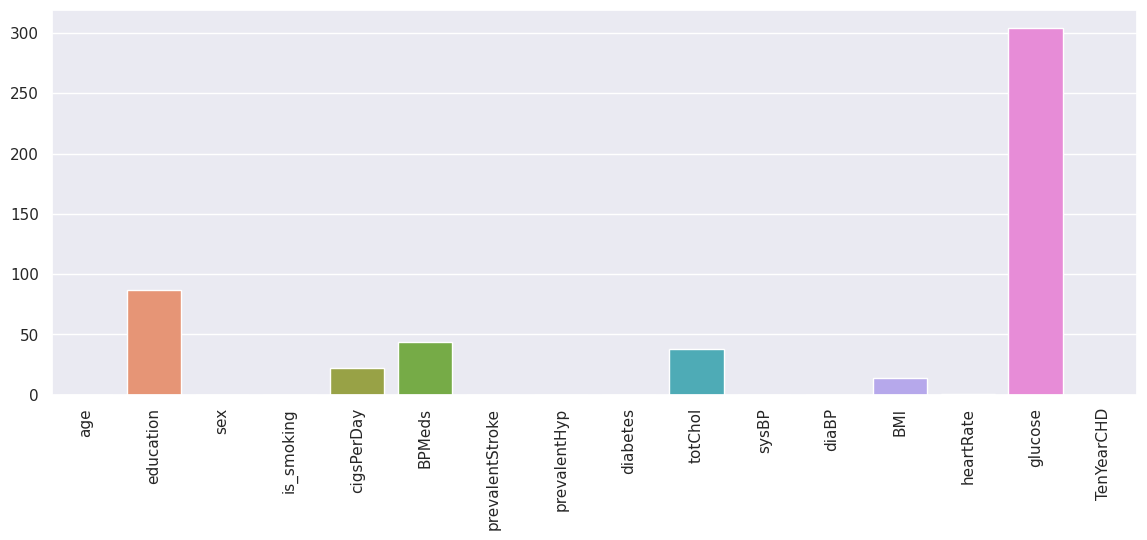

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize = (14,5))
sns.barplot(x = null_count.index, y = null_count.values )
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
# Display the plot
plt.show()



* The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).
* The dataset provides the patients’ information. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.
* **The dataset contains 3390 rows and 16 columns. There are no duplicate records, and contains 510 missing values.**

# **4. Data Cleaning:**

In [9]:
# Dataset Columns
cardio_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Dataset Describe
cardio_df.describe(include = 'all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [11]:
# Renaming the columns
cardio_df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [12]:
# Check Unique Value for each feature
for i in cardio_df.columns:
  print("Unique value in",i,":", cardio_df[i].nunique())


Unique value in age : 39
Unique value in education : 4
Unique value in sex : 2
Unique value in is_smoking : 2
Unique value in cigs_per_day : 32
Unique value in bp_meds : 2
Unique value in prevalent_stroke : 2
Unique value in prevalent_hyp : 2
Unique value in diabetes : 2
Unique value in total_cholesterol : 240
Unique value in systolic_bp : 226
Unique value in diastolic_bp : 142
Unique value in bmi : 1259
Unique value in heart_rate : 68
Unique value in glucose : 132
Unique value in ten_year_chd : 2


In [13]:
# Defining 3 lists containing the column names of
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [14]:
# Encoding the binary columns

cardio_df['sex'] = np.where(cardio_df['sex'] == 'M',1,0)
cardio_df['is_smoking'] = np.where(cardio_df['is_smoking'] == 'YES',1,0)

In [15]:
print(cardio_df['sex'].value_counts())
print(cardio_df['is_smoking'].value_counts())

0    1923
1    1467
Name: sex, dtype: int64
0    1703
1    1687
Name: is_smoking, dtype: int64


# **5. Handling missing data:**

In [16]:
# checking for null values
cardio_df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

In [17]:
# total null values
cardio_df.isna().sum().sum()

510

**There are a total of 510 missing values in the dataset.**

## **5.1. Replacing the missing values in the categorical columns with the most frequent entry:**

In [18]:
# Replacing the missing values in the categorical columns with its mode
cardio_df['education'] = cardio_df['education'].fillna(cardio_df['education'].mode()[0])
cardio_df['bp_meds'] = cardio_df['bp_meds'].fillna(cardio_df['bp_meds'].mode()[0])

In [19]:
# education distribution after mode imputation
cardio_df['education'].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [20]:
# bp_meds distribution after mode imputation
cardio_df['bp_meds'].value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

## **5.2. cigs_per_day:**

In [21]:
# Mean and median number of cigarettes per day
print(cardio_df.cigs_per_day.mean().round(0))
print(cardio_df.cigs_per_day.median())

9.0
0.0


In [22]:
# All missing values in the cigs_per_day column
cardio_df[cardio_df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


**From the above table, we find that for every instance of missing values in cigs per day, the patients reported that they smoke.**

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [23]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
print(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].mean().round(3))
print(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].median())

18.346
20.0


* Mean number of cigarettes for a smoker = 18.34
* Median number of cigarettes for a smoker = 20

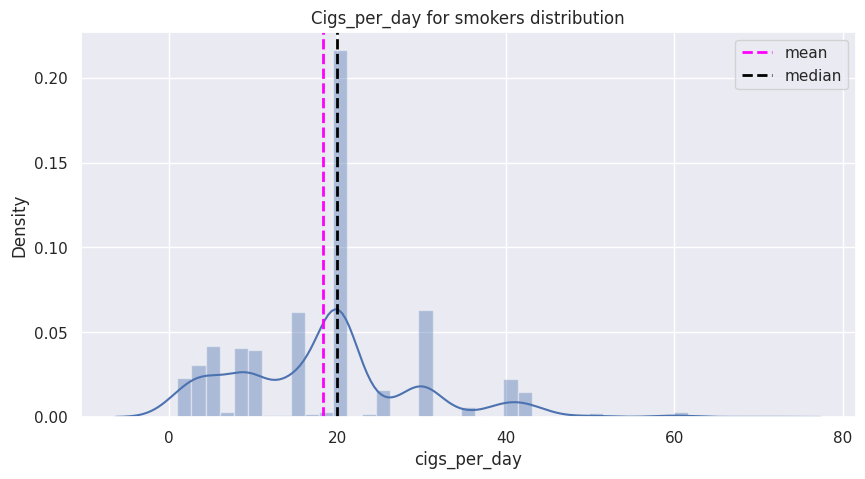

In [24]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'])
plt.axvline(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].median(), color='black', linestyle='dashed', linewidth=2, label= 'median')
plt.title('Cigs_per_day for smokers distribution')
plt.legend()
plt.show()

<Axes: >

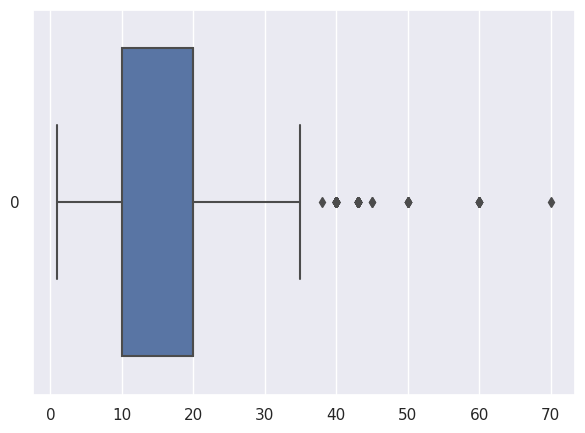

In [25]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(7,5))
sns.boxplot(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'], orient =  "h")

**Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.**

In [26]:
# Imputing the missing values in the cigs_per_day
cardio_df['cigs_per_day'] = cardio_df['cigs_per_day'].fillna(cardio_df[cardio_df['is_smoking']==1]['cigs_per_day'].median())

In [27]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

cardio_df[(cardio_df['is_smoking']==0) & (cardio_df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [28]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

cardio_df[(cardio_df['is_smoking']==1) & (cardio_df['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


**There are no errors in these columns.**

## **5.3. total_cholestrol, bmi, heart_rate:**

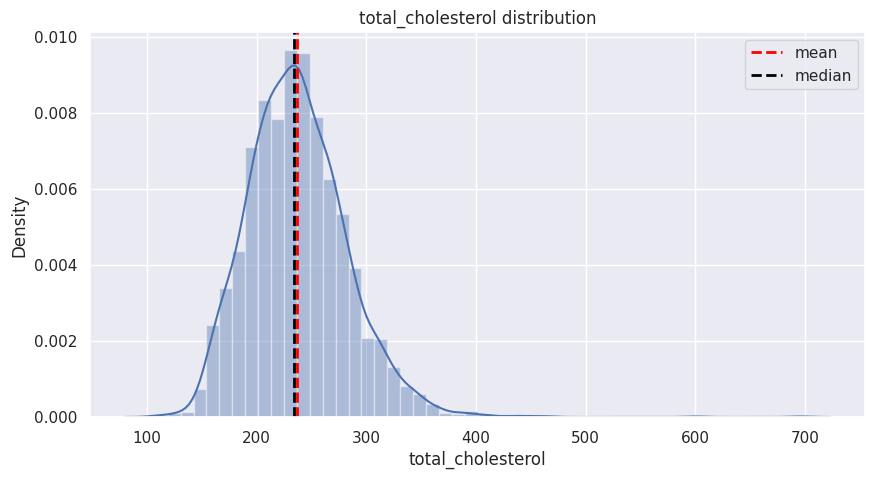

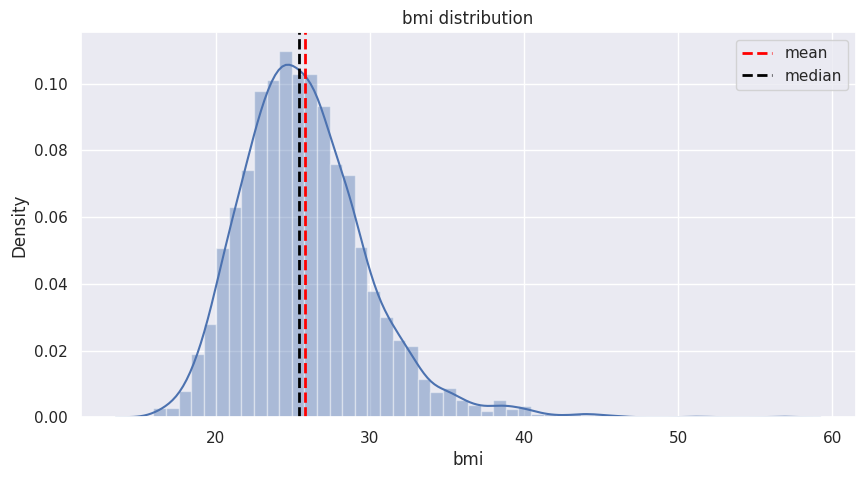

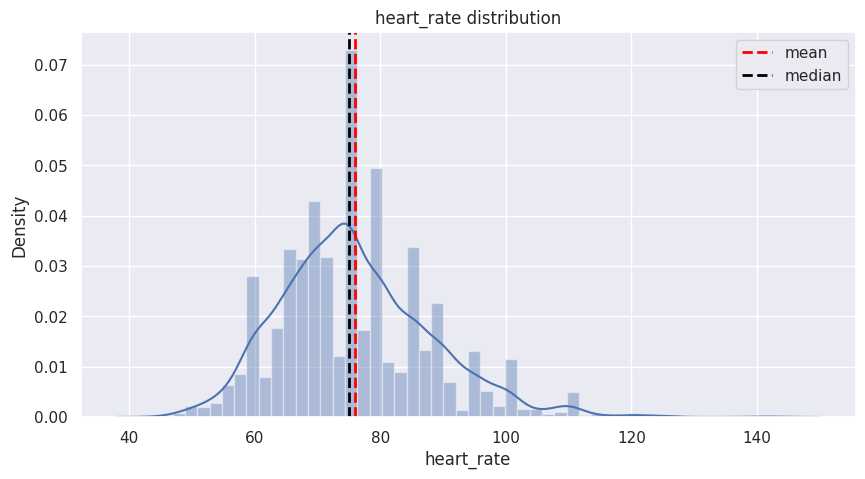

In [31]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol', 'bmi', 'heart_rate']:
  plt.figure(figsize = (10,5))
  sns.distplot(cardio_df[i])
  plt.axvline(cardio_df[i].mean(), color = 'Red', linestyle = 'dashed', linewidth= 2,label = 'mean')
  plt.axvline(cardio_df[i].median(), color = 'black', linestyle = 'dashed', linewidth= 2, label = 'median')
  plt.legend()
  plt.title(i + ' distribution')
  plt.show()

**The total_cholestrol, bmi, and heart_rate columns are positively skewed**

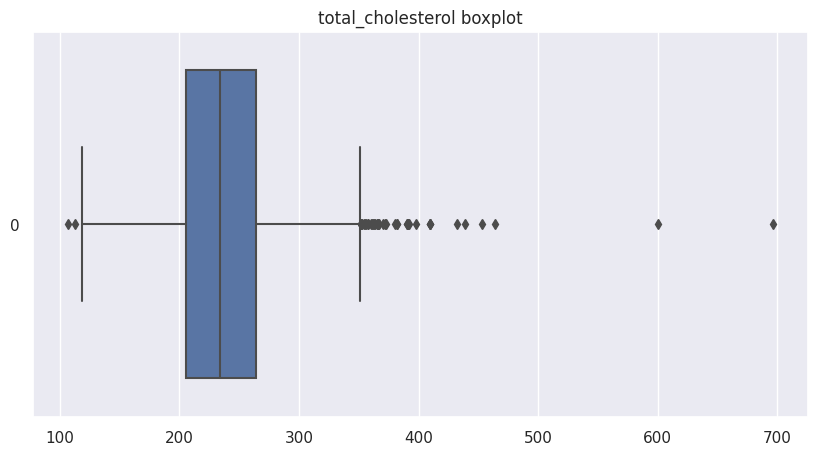

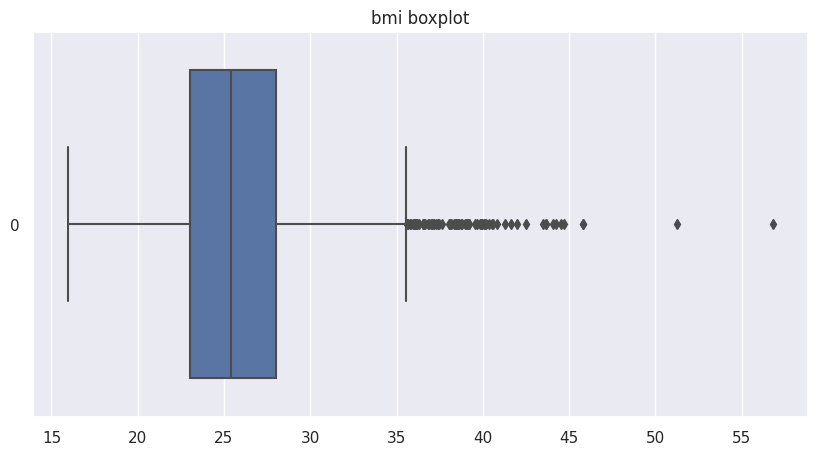

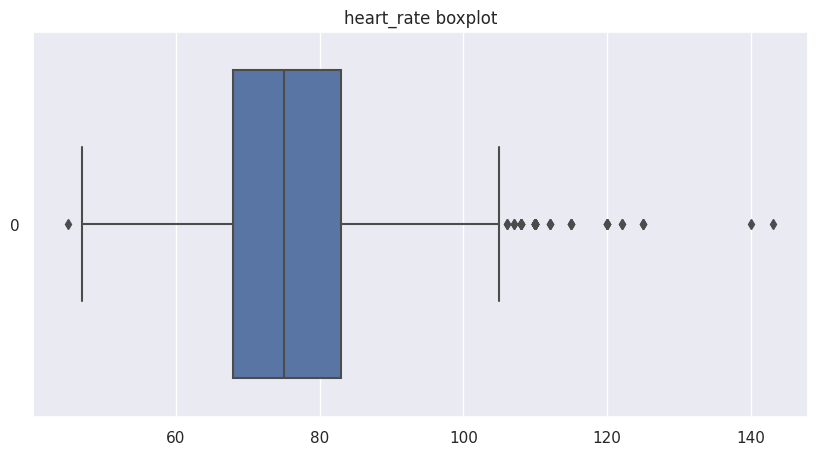

In [32]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(cardio_df[i], orient = 'h')
  plt.title(i+' boxplot')
  plt.show()

**The total_cholestrol, bmi, and heart_rate columns contain outliers.**

**Since the total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing values with its median.**


In [33]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
cardio_df['total_cholesterol'] = cardio_df['total_cholesterol'].fillna(cardio_df['total_cholesterol'].median())
cardio_df['bmi'] = cardio_df['bmi'].fillna(cardio_df['bmi'].median())
cardio_df['heart_rate'] = cardio_df['heart_rate'].fillna(cardio_df['heart_rate'].median())

## **5.4. glucose:**

**The glucose column contains 304 missing values.**

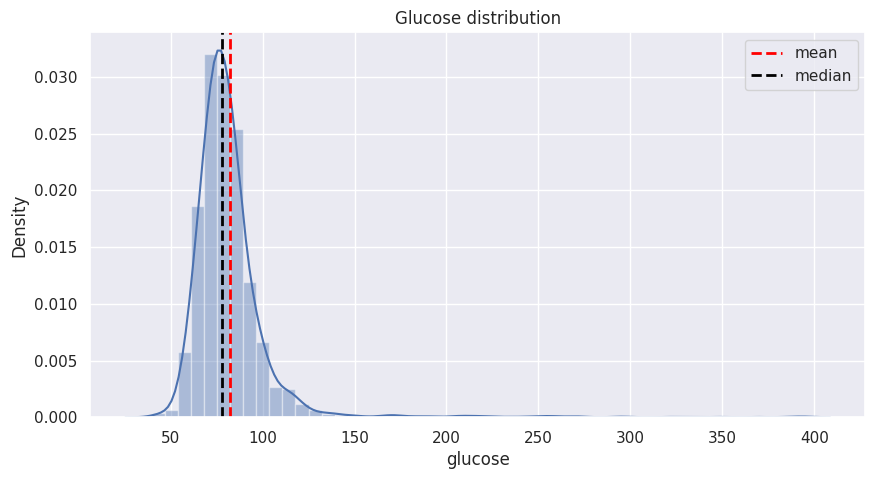

In [37]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(cardio_df['glucose'])
plt.axvline(cardio_df['glucose'].mean(), color='red', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(cardio_df['glucose'].median(), color='black', linestyle='dashed', linewidth=2 , label = 'median')
plt.title('Glucose distribution')
plt.legend()
plt.show()

**The glucose column is positively skewed.**

Text(0.5, 1.0, 'Glucose boxplot')

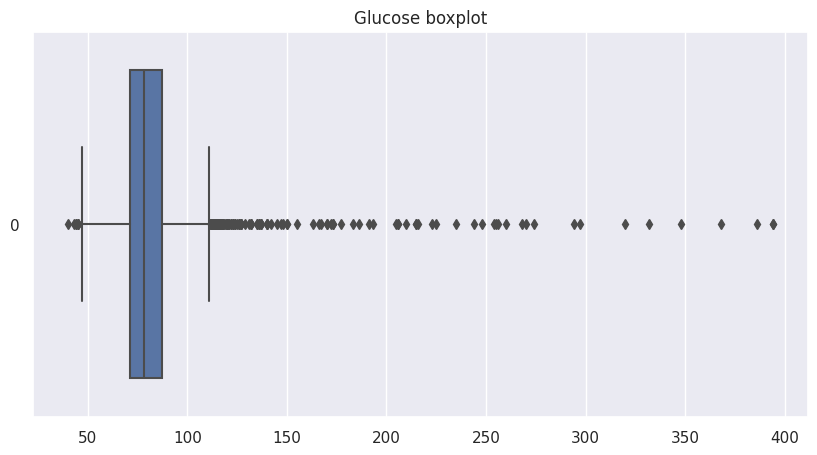

In [39]:
# Outliers in glucose
plt.figure(figsize=(10,5))
sns.boxplot(cardio_df['glucose'], orient= 'h')
plt.title('Glucose boxplot')

**The glucose column contains outliers.**

In [40]:
# Mean, median, and mode for glucose
cardio_df.glucose.mean(), cardio_df.glucose.median(), cardio_df.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

* The distribution is positively skewed, with outliers.(mean> median> mode)
* There are **304** missing values in the glucose column. **If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.**
* **To avoid this we can impute the missing values using KNN imputer.**
* If the dataset in question had been a time series, we could have used the interpolation method to impute the missing values.

In [41]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(cardio_df)
cardio_df = pd.DataFrame(imputed, columns=cardio_df.columns)

In [42]:
# mean, median, and mode for glucose after knn imputation
cardio_df.glucose.mean(), cardio_df.glucose.median(), cardio_df.glucose.mode()

(82.04327433628319,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

**After KNN imputation, there is no massive change in the values of mean. And the values of median and mode remain the same.**

In [43]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.

In [44]:
# changing datatypes
cardio_df = cardio_df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [47]:
# checking for missing values
cardio_df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

**We have successfully handled all the missing values in the dataset.**